In [37]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [276]:
df = pd.read_json("task1.json", lines=True)
#replace llama3.2 in the model column with llama3b
df['model'] = df['model'].replace('llama3.2', 'llama3b').replace('llama3.3', 'llama70b')
#replace llama3.2 in the model column with llama3b

#replace llama3.2 in the model column with llama3b
df['prompt'] = df['prompt'].replace('no', 'benchmark').replace('prompt1', 'persona')

df.drop(columns=['all_fit'], inplace=True)

df.rename(
    columns={
        'c_all_fit_hits': 'correct_match',
        'r_all_fit_hits': 'related_match',
        'r_all_fit_recall': 'related_recall'
    },
    inplace=True
)

code_path = r"d:\OneDrive - Universität Mannheim\MMM\Master Thesis\Teapot\datasets\occupation_data.xlsx"
zone_path = r"d:\OneDrive - Universität Mannheim\MMM\Master Thesis\Teapot\datasets\job_zone.xlsx"
# Read the Excel file
occupation = pd.read_excel(code_path)
occupation.drop(columns=['Description'], inplace=True)
occupation.columns = ['code', 'title']

zone = pd.read_excel(zone_path)
zone = zone[['Title', 'Job Zone']]
zone.columns = ['title', 'zone']

# Merge the occupation data with the main dataframe
df = df.merge(occupation, left_on='title', right_on='title', how='left')
df = df.merge(zone, left_on='title', right_on='title', how='left')
df

title  iteration  \
0                                      Chief Executives          0   
1                         Chief Sustainability Officers          0   
2                       General and Operations Managers          0   
3                                           Legislators          0   
4                   Advertising and Promotions Managers          0   
...                                                 ...        ...   
73835  Gas Compressor and Gas Pumping Station Operators          9   
73836           Pump Operators, Except Wellhead Pumpers          9   
73837                                  Wellhead Pumpers          9   
73838         Refuse and Recyclable Material Collectors          9   
73839                 Tank Car, Truck, and Ship Loaders          9   

       correct_match  related_match  related_recall        model     prompt  \
0                  1              1             0.5  deepseek-r1  benchmark   
1                  1              1             0.1  deepseek-r1  benchmark   
2                  0              0             0.0  deepseek-r1  benchmark   
3                  0              0             0.0  deepseek-r1  benchmark   
4                  0              1             0.9  deepseek-r1  benchmark   
...              ...            ...             ...          ...        ...   
73835              0              1             0.2      mistral    persona   
73836              0              0             0.0      mistral    persona   
73837              0              0             0.0      mistral    persona   
73838              0              0             0.0      mistral    persona   
73839              0              0             0.0      mistral    persona   

             code  zone  
0      11-1011.00     5  
1      11-1011.03     5  
2      11-1021.00     4  
3      11-1031.00     4  
4      11-2011.00     4  
...           ...   ...  
73835  53-7071.00     2  
73836  53-7072.00     2  
73837  53-7073.00     2  
73838  53-7081.00     2  
73839  53-7121.00     2  

[73840 rows x 9 columns]

In [272]:
df[df["model"] == "llama70b"].query('title == "Chief Executives"')

title  iteration  correct_match  related_match  \
36940  Chief Executives          2              1              1   
36941  Chief Executives          1              1              1   
36942  Chief Executives          0              1              1   
36943  Chief Executives          4              1              1   
36944  Chief Executives          9              1              1   
36945  Chief Executives          3              1              1   
36946  Chief Executives          8              1              1   
36947  Chief Executives          6              1              1   
36948  Chief Executives          5              1              1   
36949  Chief Executives          7              1              1   
46150  Chief Executives          0              1              1   
46250  Chief Executives          1              1              1   
46350  Chief Executives          2              1              1   
46450  Chief Executives          3              1              1   
46550  Chief Executives          4              1              1   
46650  Chief Executives          5              1              1   
46750  Chief Executives          6              1              1   
46850  Chief Executives          7              1              1   
46950  Chief Executives          8              1              1   
47050  Chief Executives          9              1              1   

       related_recall     model     prompt        code  zone  
36940             0.5  llama70b  benchmark  11-1011.00     5  
36941             0.6  llama70b  benchmark  11-1011.00     5  
36942             0.7  llama70b  benchmark  11-1011.00     5  
36943             0.5  llama70b  benchmark  11-1011.00     5  
36944             0.5  llama70b  benchmark  11-1011.00     5  
36945             0.6  llama70b  benchmark  11-1011.00     5  
36946             0.6  llama70b  benchmark  11-1011.00     5  
36947             0.5  llama70b  benchmark  11-1011.00     5  
36948             0.6  llama70b  benchmark  11-1011.00     5  
36949             0.5  llama70b  benchmark  11-1011.00     5  
46150             0.6  llama70b    persona  11-1011.00     5  
46250             0.7  llama70b    persona  11-1011.00     5  
46350             0.7  llama70b    persona  11-1011.00     5  
46450             0.6  llama70b    persona  11-1011.00     5  
46550             0.6  llama70b    persona  11-1011.00     5  
46650             0.7  llama70b    persona  11-1011.00     5  
46750             0.6  llama70b    persona  11-1011.00     5  
46850             0.6  llama70b    persona  11-1011.00     5  
46950             0.6  llama70b    persona  11-1011.00     5  
47050             0.6  llama70b    persona  11-1011.00     5

In [246]:
d1 = pd.read_json("all/llama3.3_no_prompt_results0-9-2_processed.json")
#change the iteration values, add 5 to the iteration values
d1['iteration'] = d1['iteration'].replace([0, 1, 2, 3, 4], [5, 6, 7, 8, 9])
d2 = pd.read_json("all/llama3.3_no_prompt_results0-9-1_processed.json")
d3 = pd.concat([d1, d2], ignore_index=False)
d3.sort_values(by='title', inplace=True)
d3.head(10)
d3.to_json("all/llama3.3_no_prompt_results0-9_processed.json", orient='records', lines=True)

In [263]:
d1[d1["title"] == "Chief Executives"]

title  iteration  all_fit  c_all_fit_hits  r_all_fit_hits  \
0   Chief Executives          5       79               1               1   
10  Chief Executives          6       64               1               1   
20  Chief Executives          7       61               1               1   
30  Chief Executives          8       82               1               1   
40  Chief Executives          9       75               1               1   

    r_all_fit_recall  
0                0.6  
10               0.5  
20               0.5  
30               0.6  
40               0.5

In [255]:
d4 = pd.read_json("all/task1_data.json", lines=True)
d4[d4["title"] == "Chief Executives"].query('model == "llama3.3"')

title  iteration  all_fit  c_all_fit_hits  r_all_fit_hits  \
1054   Chief Executives          0       81               1               1   
1055   Chief Executives          0       79               1               1   
1056   Chief Executives          0      109               1               1   
8448   Chief Executives          1       80               1               1   
8449   Chief Executives          1       64               1               1   
8450   Chief Executives          1       97               1               1   
15842  Chief Executives          2       78               1               1   
15843  Chief Executives          2       61               1               1   
15844  Chief Executives          2      143               1               1   
23236  Chief Executives          3       73               1               1   
23237  Chief Executives          3       82               1               1   
23238  Chief Executives          3      119               1               1   
30630  Chief Executives          4       63               1               1   
30631  Chief Executives          4       75               1               1   
30632  Chief Executives          4      117               1               1   
38020  Chief Executives          5      108               1               1   
45394  Chief Executives          6       88               1               1   
52768  Chief Executives          7      133               1               1   
60142  Chief Executives          8       87               1               1   
67516  Chief Executives          9      149               1               1   

       r_all_fit_recall     model   prompt  
1054                0.7  llama3.3       no  
1055                0.6  llama3.3       no  
1056                0.6  llama3.3  prompt1  
8448                0.6  llama3.3       no  
8449                0.5  llama3.3       no  
8450                0.7  llama3.3  prompt1  
15842               0.5  llama3.3       no  
15843               0.5  llama3.3       no  
15844               0.7  llama3.3  prompt1  
23236               0.6  llama3.3       no  
23237               0.6  llama3.3       no  
23238               0.6  llama3.3  prompt1  
30630               0.5  llama3.3       no  
30631               0.5  llama3.3       no  
30632               0.6  llama3.3  prompt1  
38020               0.7  llama3.3  prompt1  
45394               0.6  llama3.3  prompt1  
52768               0.6  llama3.3  prompt1  
60142               0.6  llama3.3  prompt1  
67516               0.6  llama3.3  prompt1

In [199]:
df_avg = df.groupby(["title", "model", "prompt", "code", "zone"]).mean().reset_index().drop(columns=["iteration"])
df_avg.head(16)

title        model     prompt        code  zone  \
0   Accountants and Auditors  deepseek-r1  benchmark  13-2011.00     4   
1   Accountants and Auditors  deepseek-r1    persona  13-2011.00     4   
2   Accountants and Auditors      llama3b  benchmark  13-2011.00     4   
3   Accountants and Auditors      llama3b    persona  13-2011.00     4   
4   Accountants and Auditors     llama70b  benchmark  13-2011.00     4   
5   Accountants and Auditors     llama70b    persona  13-2011.00     4   
6   Accountants and Auditors      mistral  benchmark  13-2011.00     4   
7   Accountants and Auditors      mistral    persona  13-2011.00     4   
8                     Actors  deepseek-r1  benchmark  27-2011.00     2   
9                     Actors  deepseek-r1    persona  27-2011.00     2   
10                    Actors      llama3b  benchmark  27-2011.00     2   
11                    Actors      llama3b    persona  27-2011.00     2   
12                    Actors     llama70b  benchmark  27-2011.00     2   
13                    Actors     llama70b    persona  27-2011.00     2   
14                    Actors      mistral  benchmark  27-2011.00     2   
15                    Actors      mistral    persona  27-2011.00     2   

    correct_match  related_match  related_recall  
0             0.0            0.0            0.00  
1             0.0            1.0            0.59  
2             0.0            1.0            0.56  
3             0.0            1.0            0.60  
4             0.0            1.0            0.56  
5             0.0            1.0            0.60  
6             0.0            0.5            0.14  
7             0.0            1.0            0.55  
8             1.0            1.0            0.20  
9             1.0            1.0            0.24  
10            0.9            1.0            0.23  
11            1.0            1.0            0.23  
12            1.0            1.0            0.30  
13            1.0            1.0            0.29  
14            0.4            0.8            0.15  
15            1.0            1.0            0.28

In [194]:
df_pivot = df.pivot_table(index=["title", "code", "zone", "model", "iteration"], columns=["prompt"], values="correct_match").reset_index()
df_pivot["diff"] = df_pivot["persona"] - df_pivot["benchmark"]
df_pivot

prompt                               title        code  zone        model  \
0                 Accountants and Auditors  13-2011.00     4  deepseek-r1   
1                 Accountants and Auditors  13-2011.00     4  deepseek-r1   
2                 Accountants and Auditors  13-2011.00     4  deepseek-r1   
3                 Accountants and Auditors  13-2011.00     4  deepseek-r1   
4                 Accountants and Auditors  13-2011.00     4  deepseek-r1   
...                                    ...         ...   ...          ...   
36915   Zoologists and Wildlife Biologists  19-1023.00     4      mistral   
36916   Zoologists and Wildlife Biologists  19-1023.00     4      mistral   
36917   Zoologists and Wildlife Biologists  19-1023.00     4      mistral   
36918   Zoologists and Wildlife Biologists  19-1023.00     4      mistral   
36919   Zoologists and Wildlife Biologists  19-1023.00     4      mistral   

prompt  iteration  benchmark  persona  diff  
0               0        0.0      0.0   0.0  
1               1        0.0      0.0   0.0  
2               2        0.0      0.0   0.0  
3               3        0.0      0.0   0.0  
4               4        0.0      0.0   0.0  
...           ...        ...      ...   ...  
36915           5        0.0      0.0   0.0  
36916           6        0.0      0.0   0.0  
36917           7        0.0      0.0   0.0  
36918           8        0.0      0.0   0.0  
36919           9        0.0      0.0   0.0  

[36920 rows x 8 columns]

In [200]:
deepseek = df_avg[df_avg["model"] == "deepseek-r1"]
llama3b = df_avg[df_avg["model"] == "llama3b"]
llama70b = df_avg[df_avg["model"] == "llama70b"]
mistral = df_avg[df_avg["model"] == "mistral"]

# deepseek_benchmark = deepseek[deepseek["prompt"] == "benchmark"]
# deepseek_persona = deepseek[deepseek["prompt"] == "persona"]
# llama3b_benchmark = llama3b[llama3b["prompt"] == "benchmark"]
# llama3b_persona = llama3b[llama3b["prompt"] == "persona"]
# llama70b_benchmark = llama70b[llama70b["prompt"] == "benchmark"]
# llama70b_persona = llama70b[llama70b["prompt"] == "persona"]
# mistral_benchmark = mistral[mistral["prompt"] == "benchmark"]
# mistral_persona = mistral[mistral["prompt"] == "persona"]


### Descriptive Stats

### Correct Match

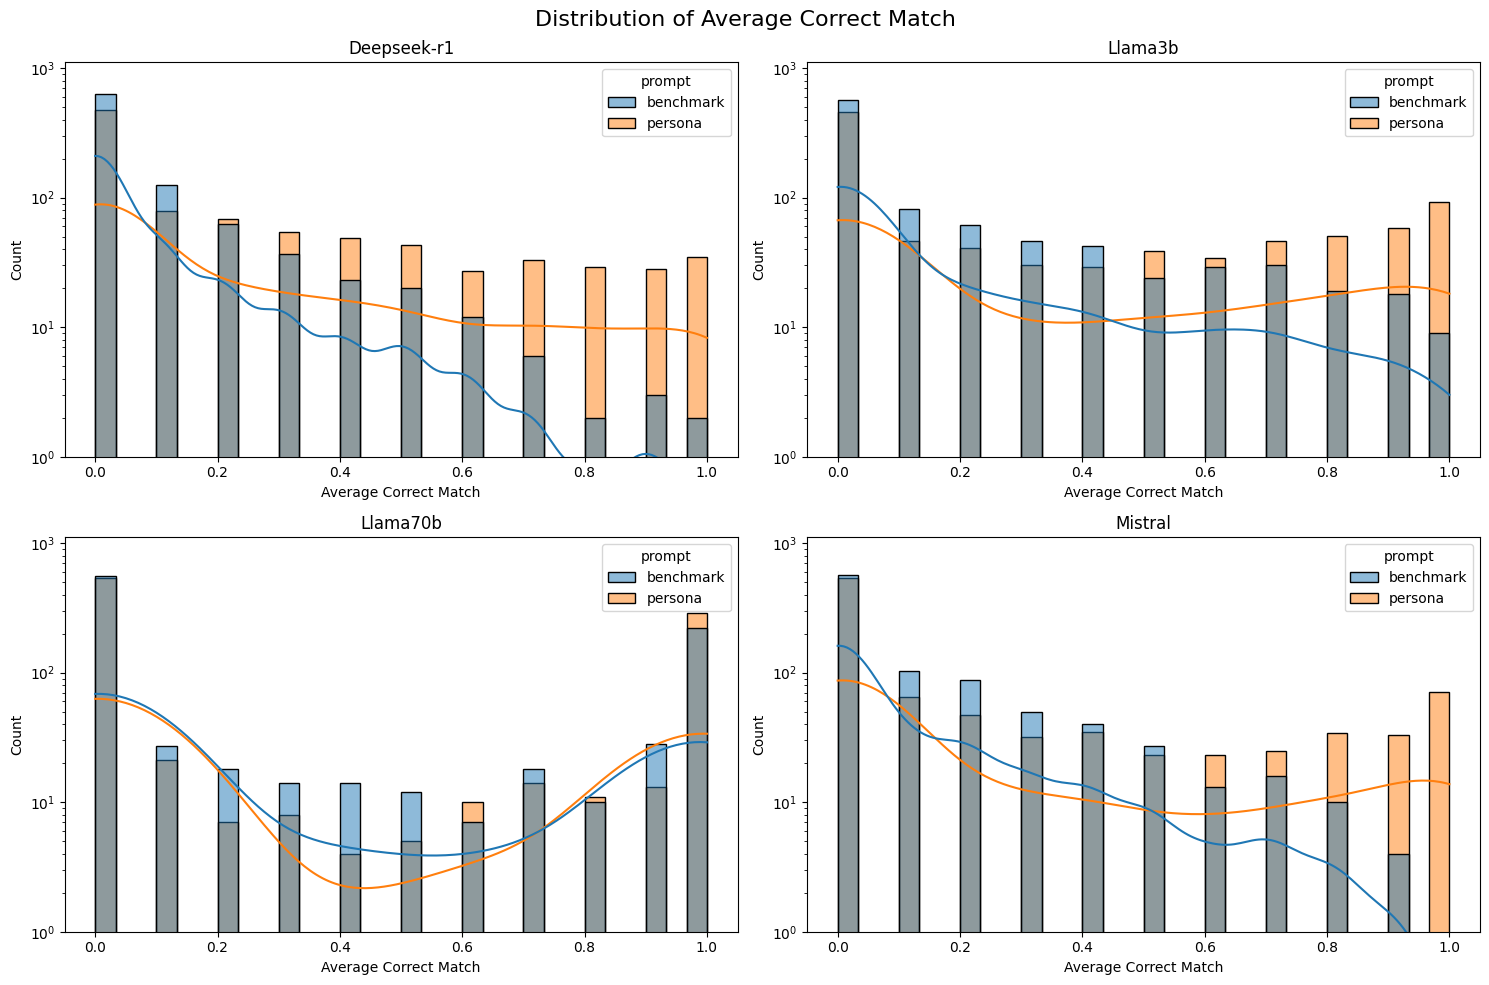

In [201]:
plt.figure(figsize=(15, 10))

# Calculate the maximum y-value across all plots
max_y = max(
    deepseek["correct_match"].value_counts().max(),
    llama3b["correct_match"].value_counts().max(),
    llama70b["correct_match"].value_counts().max(),
    mistral["correct_match"].value_counts().max()
)
#add a title to the plot
plt.suptitle("Distribution of Average Correct Match", fontsize=16)
# Plot the distribution of the data
plt.subplot(2, 2, 1)
sns.histplot(data=deepseek, x="correct_match", hue="prompt", bins=30, kde=True, alpha=0.5)
plt.xlabel("Average Correct Match")
plt.yscale('log')
plt.ylim(1, max_y)  # Set the same y-axis limit
plt.title("Deepseek-r1")

plt.subplot(2, 2, 2)
sns.histplot(data=llama3b, x="correct_match", hue="prompt", bins=30, kde=True, alpha=0.5)
plt.xlabel("Average Correct Match")
plt.yscale('log')
plt.ylim(1, max_y)  # Set the same y-axis limit
plt.title("Llama3b")

plt.subplot(2, 2, 3)
sns.histplot(data=llama70b, x="correct_match", hue="prompt", bins=30, kde=True, alpha=0.5)
plt.xlabel("Average Correct Match")
plt.yscale('log')
plt.ylim(1, max_y)  # Set the same y-axis limit
plt.title("Llama70b")

plt.subplot(2, 2, 4)
sns.histplot(data=mistral, x="correct_match", hue="prompt", bins=30, kde=True, alpha=0.5)
plt.xlabel("Average Correct Match")
plt.yscale('log')
plt.ylim(1, max_y)  # Set the same y-axis limit
plt.title("Mistral")

plt.tight_layout()
plt.show()

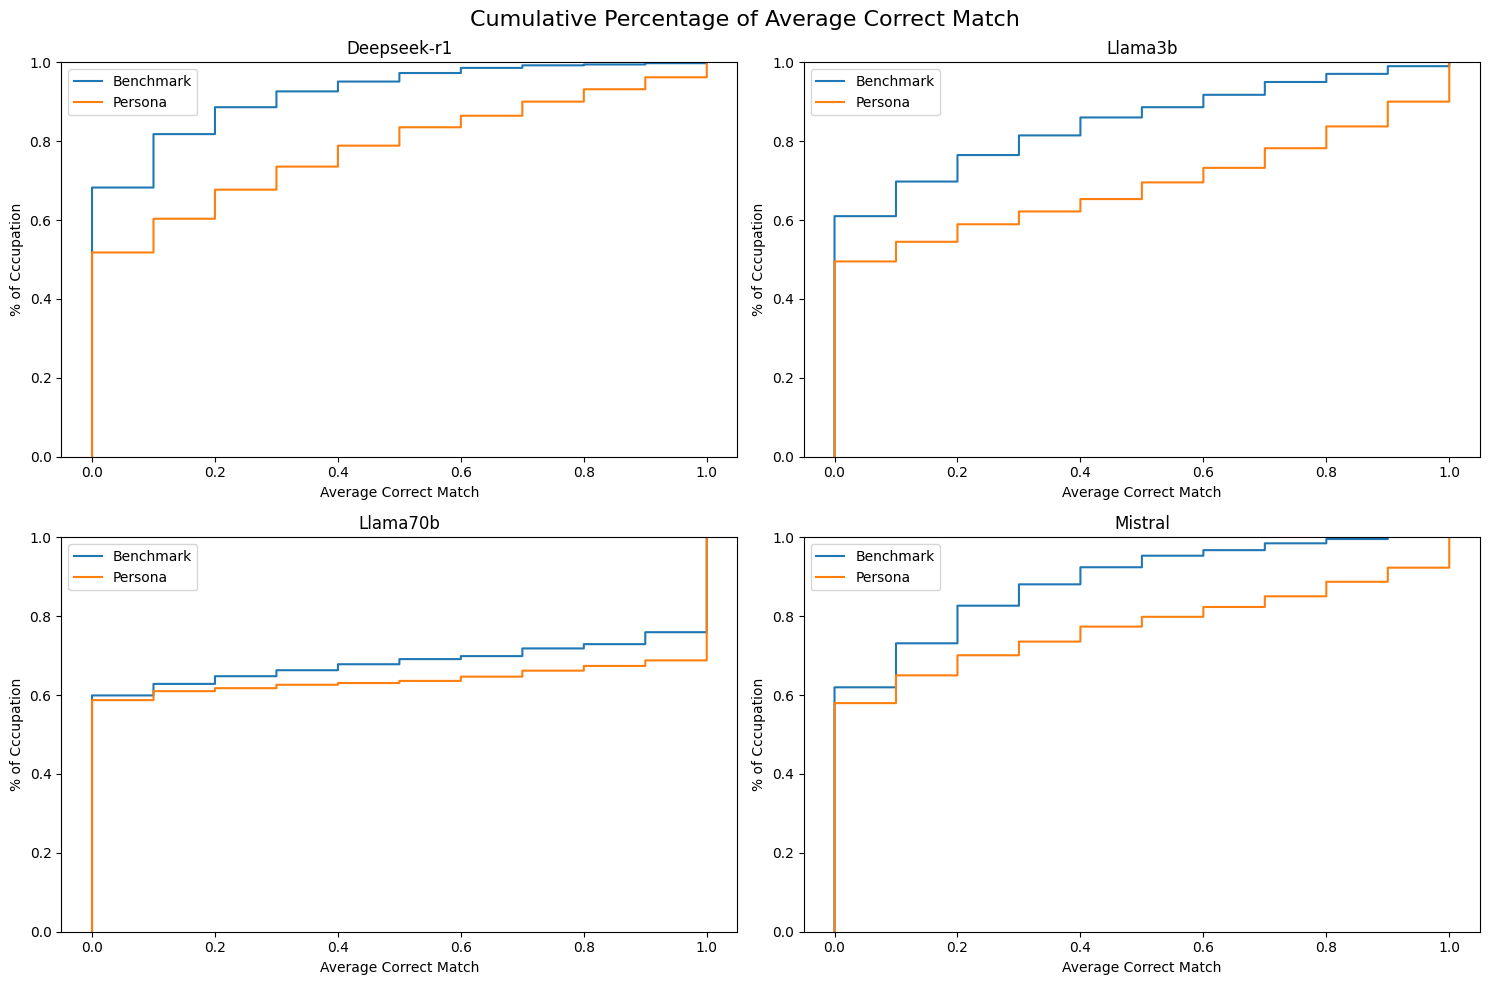

In [203]:
models = ["deepseek-r1", "llama3b", "llama70b", "mistral"]
plt.figure(figsize=(15, 10))
plt.suptitle("Cumulative Percentage of Average Correct Match", fontsize=16)
for i, model in enumerate(models, 1):
    plt.subplot(2, 2, i)
    for prompt in ["benchmark", "persona"]:
        data_subset = df_avg[(df_avg["model"] == model) & (df_avg["prompt"] == prompt)]
        sns.ecdfplot(data=data_subset, x="correct_match", label=prompt.capitalize(), )
    plt.title(f"{model.capitalize()}")
    plt.xlabel("Average Correct Match")
    plt.ylabel("% of Cccupation")
    plt.legend()

plt.tight_layout()
plt.show()

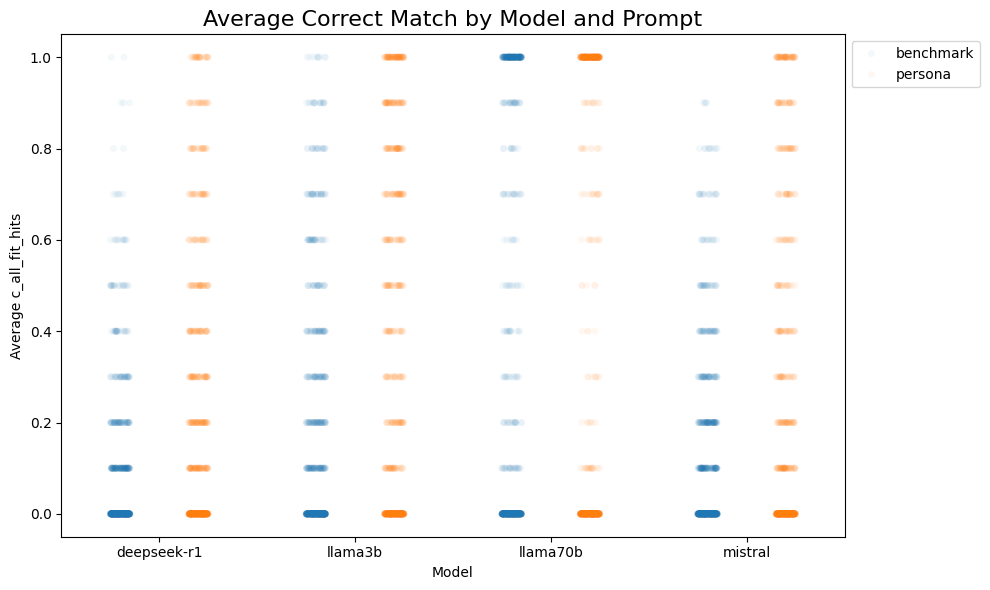

In [23]:
# Calculate the average c_all_fit_hits for each model and prompt
avg_hits = df_avg.groupby(["model", "prompt"])["c_all_fit_hits"].mean().reset_index()

# Create a single barplot
plt.figure(figsize=(10, 6))
# sns.violinplot(data=df_avg, x="model", y="c_all_fit_hits", hue="prompt", bw_adjust=3)
sns.stripplot(data=df_avg, x="model", y="c_all_fit_hits", hue="prompt", dodge=True, 
              size=5, alpha=0.05, jitter=True)

# Add labels and title
plt.title("Average Correct Match by Model and Prompt", fontsize=16)
plt.xlabel("Model")
plt.ylabel("Average c_all_fit_hits")
 # Ensure some padding on the y-axis, no box around the legend
plt.legend(bbox_to_anchor=(1, 1), loc='upper left')

# Show the plot
plt.tight_layout()
plt.show()

In [206]:
models = ["deepseek-r1", "llama3b", "llama70b", "mistral"]

for model in models:
    # Filter the dataframe for the current model
    model_data = df_pivot[df_pivot['model'] == model].copy()
    model_data['difference'] = model_data['persona'] - model_data['benchmark']

    # Perform the Wilcoxon signed-rank test on the differences
    statistic, p_value = stats.wilcoxon(model_data['difference'])

    print(f"Model: {model}")
    print("Wilcoxon Signed-Rank Test Results:")
    print(f"  W-statistic: {statistic:.4f}")
    print(f"  p-value: {p_value:.4f}")

    # Interpretation of the p-value
    alpha = 0.05  # significance level
    if p_value < alpha:
        print(f"\nThe p-value ({p_value:.4f}) is less than the significance level ({alpha}).")
        print("This suggests that there is a statistically significant difference in the similarity scores")
        print("between the benchmark and persona conditions across all occupations and iterations.")
        print("We reject the null hypothesis that there is no difference.")
    else:
        print(f"\nThe p-value ({p_value:.4f}) is greater than or equal to the significance level ({alpha}).")
        print("This suggests that there is no statistically significant difference in the similarity scores")
        print("between the benchmark and persona conditions across all occupations and iterations.")
        print("We fail to reject the null hypothesis.")
    print("\n" + "-" * 50 + "\n")


Model: deepseek-r1
Wilcoxon Signed-Rank Test Results:
  W-statistic: 299071.5000
  p-value: 0.0000

The p-value (0.0000) is less than the significance level (0.05).
This suggests that there is a statistically significant difference in the similarity scores
between the benchmark and persona conditions across all occupations and iterations.
We reject the null hypothesis that there is no difference.

--------------------------------------------------

Model: llama3b
Wilcoxon Signed-Rank Test Results:
  W-statistic: 558609.5000
  p-value: 0.0000

The p-value (0.0000) is less than the significance level (0.05).
This suggests that there is a statistically significant difference in the similarity scores
between the benchmark and persona conditions across all occupations and iterations.
We reject the null hypothesis that there is no difference.

--------------------------------------------------

Model: llama70b
Wilcoxon Signed-Rank Test Results:
  W-statistic: nan
  p-value: nan

The p-value 

In [215]:
df_test = df_pivot[df_pivot["model"] == "llama70b"]
# find out the row with na values
df_test[df_test.isna().any(axis=1)]

prompt                                title        code  zone     model  \
345        Administrative Services Managers  11-3012.00     3  llama70b   
346        Administrative Services Managers  11-3012.00     3  llama70b   
347        Administrative Services Managers  11-3012.00     3  llama70b   
348        Administrative Services Managers  11-3012.00     3  llama70b   
349        Administrative Services Managers  11-3012.00     3  llama70b   
505     Advertising and Promotions Managers  11-2011.00     4  llama70b   
506     Advertising and Promotions Managers  11-2011.00     4  llama70b   
507     Advertising and Promotions Managers  11-2011.00     4  llama70b   
508     Advertising and Promotions Managers  11-2011.00     4  llama70b   
509     Advertising and Promotions Managers  11-2011.00     4  llama70b   
5265                       Chief Executives  11-1011.00     5  llama70b   
5266                       Chief Executives  11-1011.00     5  llama70b   
5267                       Chief Executives  11-1011.00     5  llama70b   
5268                       Chief Executives  11-1011.00     5  llama70b   
5269                       Chief Executives  11-1011.00     5  llama70b   
5305          Chief Sustainability Officers  11-1011.03     5  llama70b   
5306          Chief Sustainability Officers  11-1011.03     5  llama70b   
5307          Chief Sustainability Officers  11-1011.03     5  llama70b   
5308          Chief Sustainability Officers  11-1011.03     5  llama70b   
5309          Chief Sustainability Officers  11-1011.03     5  llama70b   
15105                  Fundraising Managers  11-2033.00     4  llama70b   
15106                  Fundraising Managers  11-2033.00     4  llama70b   
15107                  Fundraising Managers  11-2033.00     4  llama70b   
15108                  Fundraising Managers  11-2033.00     4  llama70b   
15109                  Fundraising Managers  11-2033.00     4  llama70b   
15705       General and Operations Managers  11-1021.00     4  llama70b   
15706       General and Operations Managers  11-1021.00     4  llama70b   
15707       General and Operations Managers  11-1021.00     4  llama70b   
15708       General and Operations Managers  11-1021.00     4  llama70b   
15709       General and Operations Managers  11-1021.00     4  llama70b   
19545                           Legislators  11-1031.00     4  llama70b   
19546                           Legislators  11-1031.00     4  llama70b   
19547                           Legislators  11-1031.00     4  llama70b   
19548                           Legislators  11-1031.00     4  llama70b   
19549                           Legislators  11-1031.00     4  llama70b   
21025                    Marketing Managers  11-2021.00     4  llama70b   
21026                    Marketing Managers  11-2021.00     4  llama70b   
21027                    Marketing Managers  11-2021.00     4  llama70b   
21028                    Marketing Managers  11-2021.00     4  llama70b   
21029                    Marketing Managers  11-2021.00     4  llama70b   
28585             Public Relations Managers  11-2032.00     4  llama70b   
28586             Public Relations Managers  11-2032.00     4  llama70b   
28587             Public Relations Managers  11-2032.00     4  llama70b   
28588             Public Relations Managers  11-2032.00     4  llama70b   
28589             Public Relations Managers  11-2032.00     4  llama70b   
30705                        Sales Managers  11-2022.00     4  llama70b   
30706                        Sales Managers  11-2022.00     4  llama70b   
30707                        Sales Managers  11-2022.00     4  llama70b   
30708                        Sales Managers  11-2022.00     4  llama70b   
30709                        Sales Managers  11-2022.00     4  llama70b   

prompt  iteration  benchmark  persona  diff  
345             5        NaN      1.0   NaN  
346             6        NaN      1.0   NaN  
347             7        NaN      1.

In [66]:
import pandas as pd

# Assuming you have the pivoted dataframe 'df_pivot' with 'title', 'iteration', 'benchmark', 'persona', and 'difference' columns
df_pivot['absolute_difference'] = abs(df_pivot['difference'])
largest_differences = df_pivot.sort_values(by='difference', ascending=False)

print("Pairs with the largest absolute differences:")
print(largest_differences[['title', 'iteration', 'benchmark', 'persona', 'difference', 'absolute_difference']].head(20)) # Display top 10

Pairs with the largest absolute differences:
prompt                                title  iteration  benchmark  persona  \
2508                                Editors          8        0.0      1.0   
1767                Conservation Scientists          7        0.0      1.0   
7746           Search Marketing Strategists          6        0.0      1.0   
5913                           Neurologists          3        0.0      1.0   
1800    Continuous Mining Machine Operators          0        0.0      1.0   
1801    Continuous Mining Machine Operators          1        0.0      1.0   
1804    Continuous Mining Machine Operators          4        0.0      1.0   
1805    Continuous Mining Machine Operators          5        0.0      1.0   
1808    Continuous Mining Machine Operators          8        0.0      1.0   
7739                   School Psychologists          9        0.0      1.0   
7738                   School Psychologists          8        0.0      1.0   
5918               

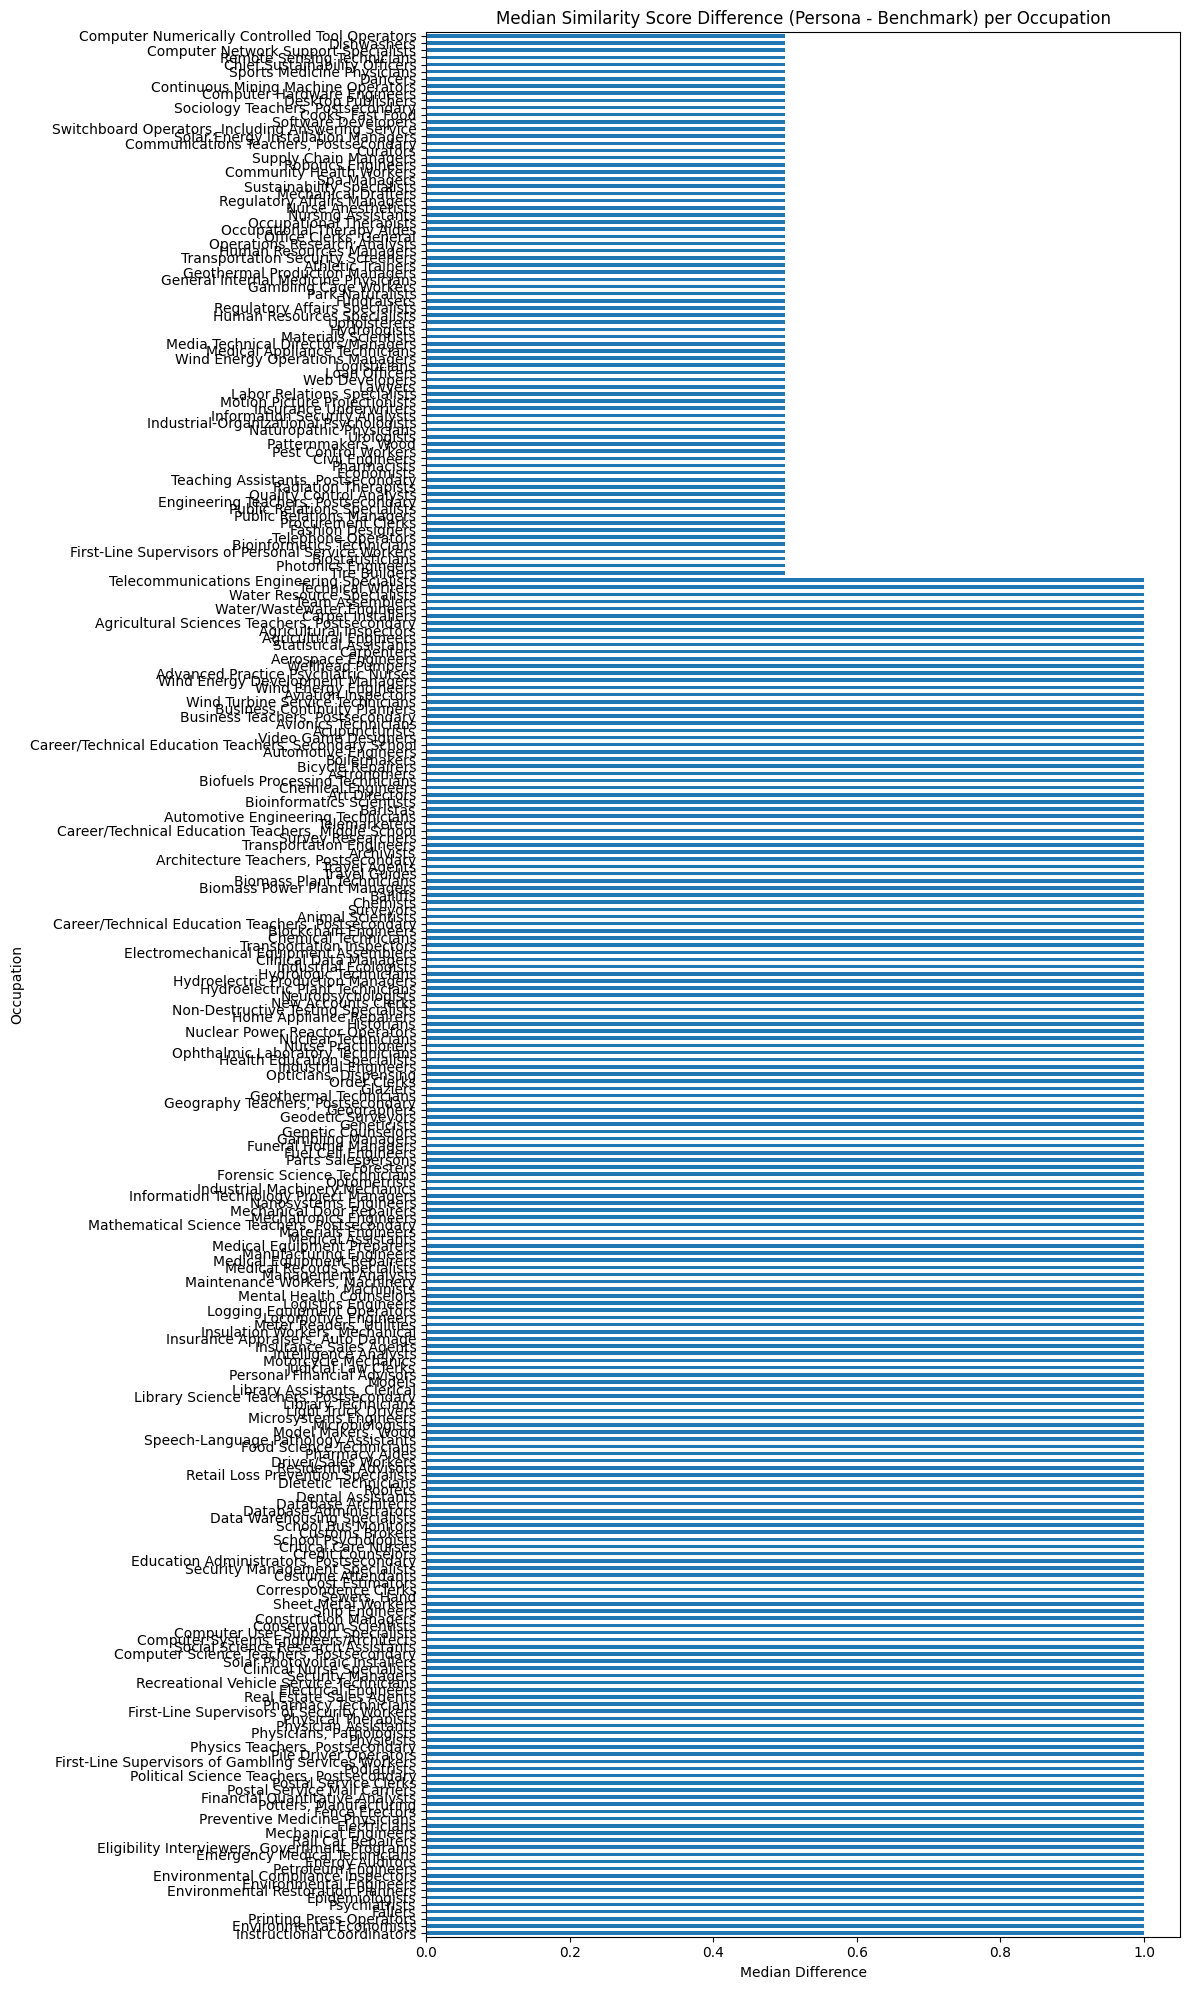

In [83]:
import matplotlib.pyplot as plt
import seaborn as sns

median_diff_per_occupation = df_pivot.groupby('title')['absolute_difference'].median().sort_values(ascending=False)
#drop the rows with 0 values
median_diff_per_occupation = median_diff_per_occupation[median_diff_per_occupation != 0]

plt.figure(figsize=(12, 20))  # Adjust figure size as needed
median_diff_per_occupation.plot(kind='barh')
plt.title('Median Similarity Score Difference (Persona - Benchmark) per Occupation')
plt.xlabel('Median Difference')
plt.ylabel('Occupation')
plt.tight_layout()
plt.show()

Magnitude of Change in Average Similarity Score per Occupation:
prompt                                         benchmark_avg  persona_avg  \
title                                                                       
Environmental Compliance Inspectors                      0.0          1.0   
Postal Service Mail Carriers                             0.0          1.0   
Eligibility Interviewers, Government Programs            0.0          1.0   
Postal Service Clerks                                    0.0          1.0   
Recreational Vehicle Service Technicians                 0.0          1.0   
New Accounts Clerks                                      0.0          1.0   
Medical Records Specialists                              0.0          1.0   
Agricultural Inspectors                                  0.0          1.0   
Electromechanical Equipment Assemblers                   0.0          1.0   
Agricultural Engineers                                   0.0          1.0   
Credit Couns

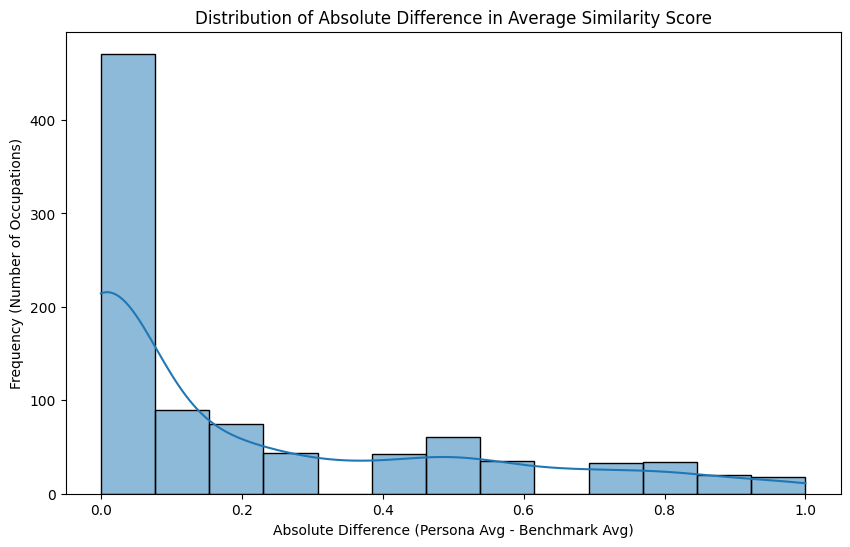

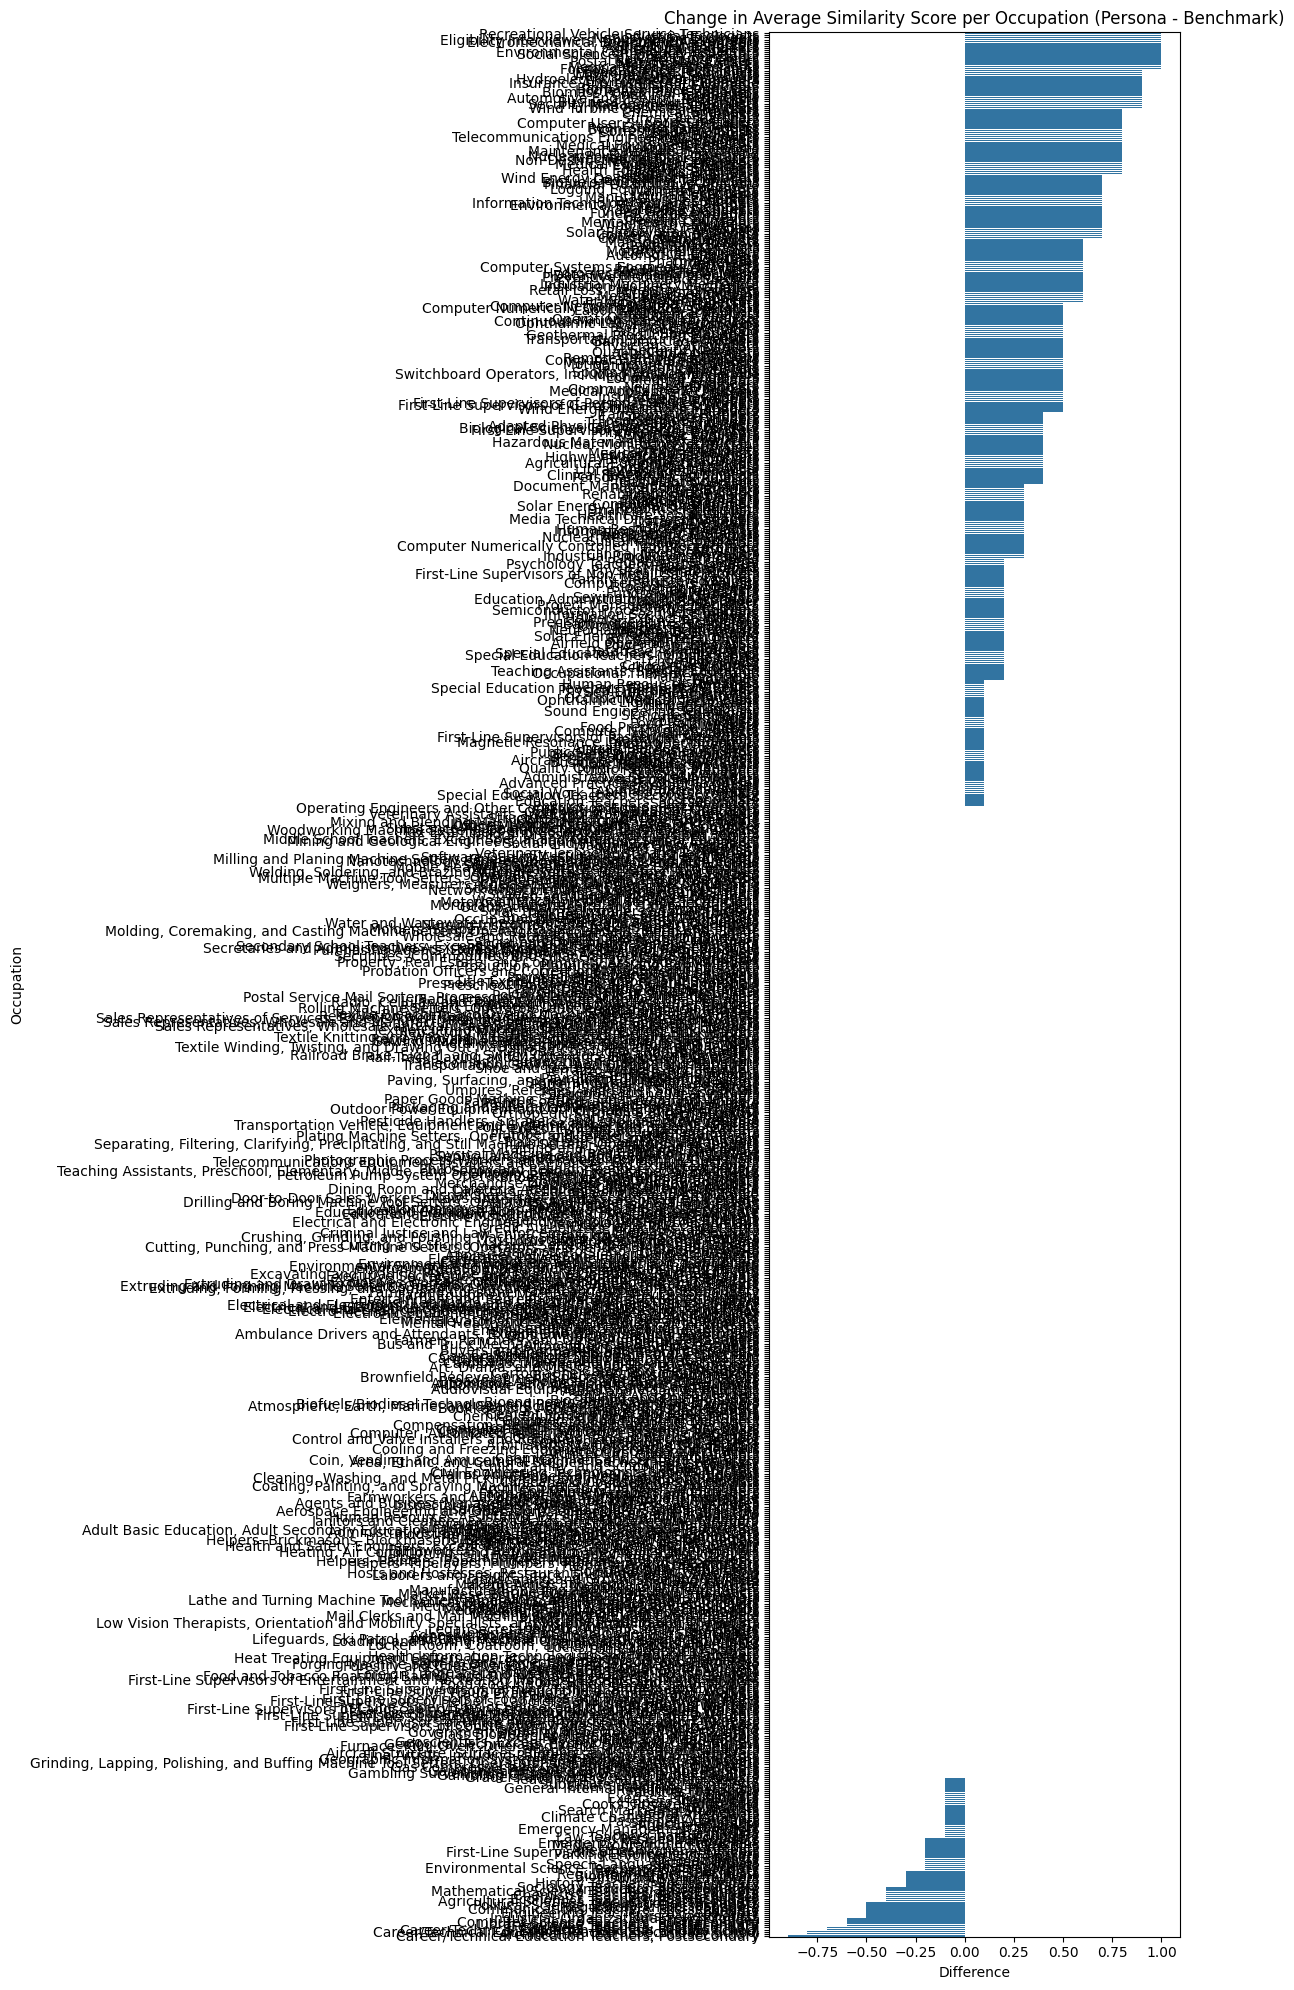

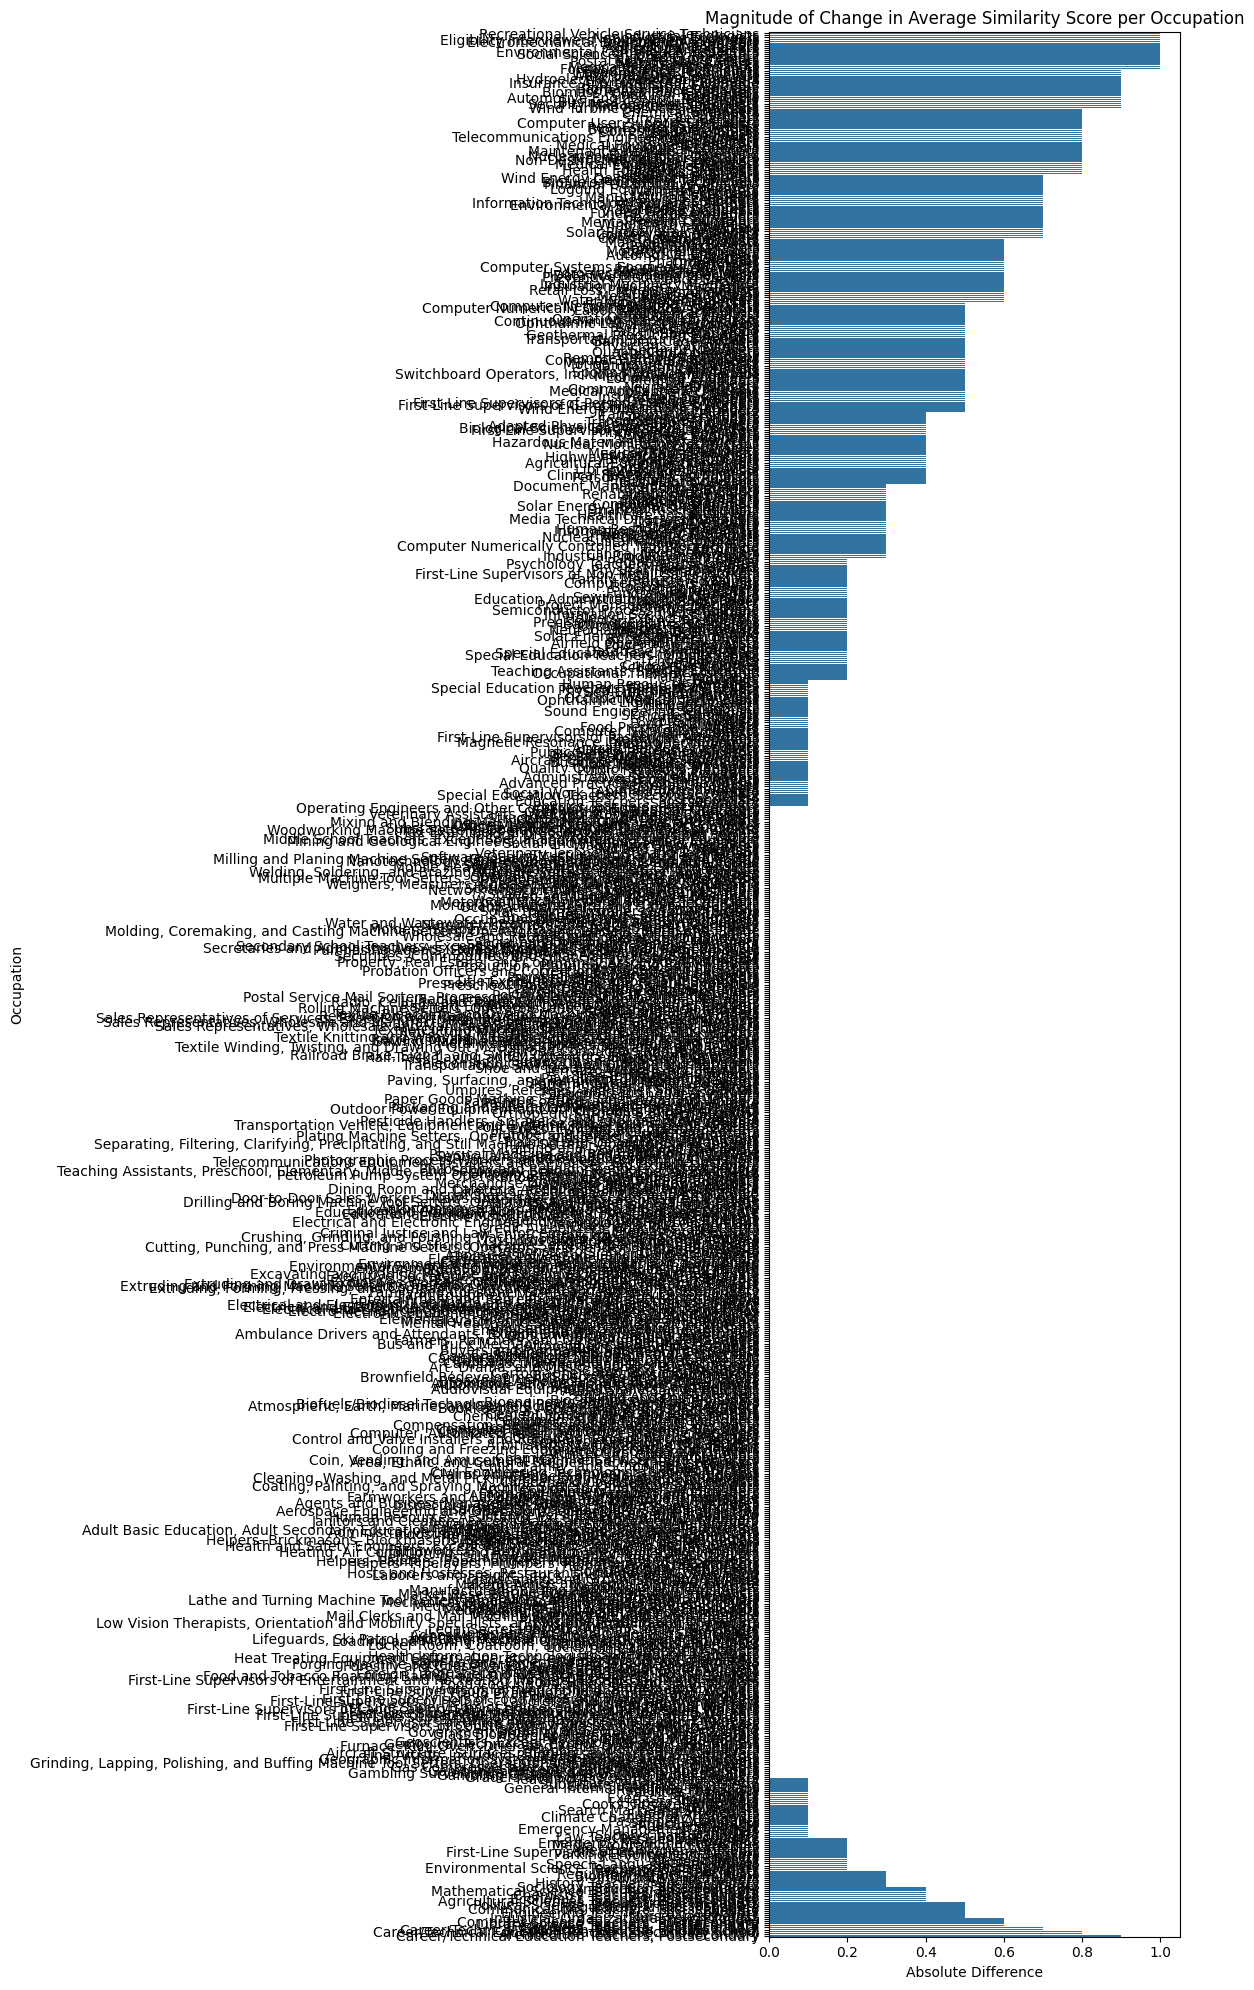

In [91]:
import pandas as pd

# Assuming you have the dataframe 'df' as in your initial example
df_avg = df[df["model"] == "llama3b"].copy()
# Calculate the average similarity score for benchmark and persona for each occupation
df_avg = df_avg.groupby(['title', 'prompt'])['c_all_fit_hits'].mean().unstack()
df_avg = df_avg.rename(columns={'benchmark': 'benchmark_avg', 'persona': 'persona_avg'})
df_avg['difference'] = df_avg['persona_avg'] - df_avg['benchmark_avg']
df_avg['absolute_difference'] = abs(df_avg['difference'])

# Sort by absolute difference to see jobs with the largest magnitude of change
magnitude_of_change = df_avg.sort_values(by='absolute_difference', ascending=False)

print("Magnitude of Change in Average Similarity Score per Occupation:")
print(magnitude_of_change[['benchmark_avg', 'persona_avg', 'difference', 'absolute_difference']].head(20))

# To get a sense of the distribution of these magnitudes:
print("\nSummary Statistics of Absolute Differences:")
print(magnitude_of_change['absolute_difference'].describe())

# You can also visualize this distribution using a histogram:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(magnitude_of_change['absolute_difference'], kde=True)
plt.title('Distribution of Absolute Difference in Average Similarity Score')
plt.xlabel('Absolute Difference (Persona Avg - Benchmark Avg)')
plt.ylabel('Frequency (Number of Occupations)')
plt.show()

# To visualize the change for each job (showing direction):
sorted_by_difference = df_avg.sort_values(by='difference', ascending=False)

plt.figure(figsize=(12, 20))  # Adjust figure size as needed
sns.barplot(data=sorted_by_difference, x='difference', y=sorted_by_difference.index)
plt.title('Change in Average Similarity Score per Occupation (Persona - Benchmark)')
plt.xlabel('Difference')
plt.ylabel('Occupation')
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 20))  # Adjust figure size as needed
sns.barplot(data=sorted_by_difference, x='absolute_difference', y=sorted_by_difference.index)
plt.title('Magnitude of Change in Average Similarity Score per Occupation')
plt.xlabel('Absolute Difference')
plt.ylabel('Occupation')
plt.tight_layout()
plt.show()

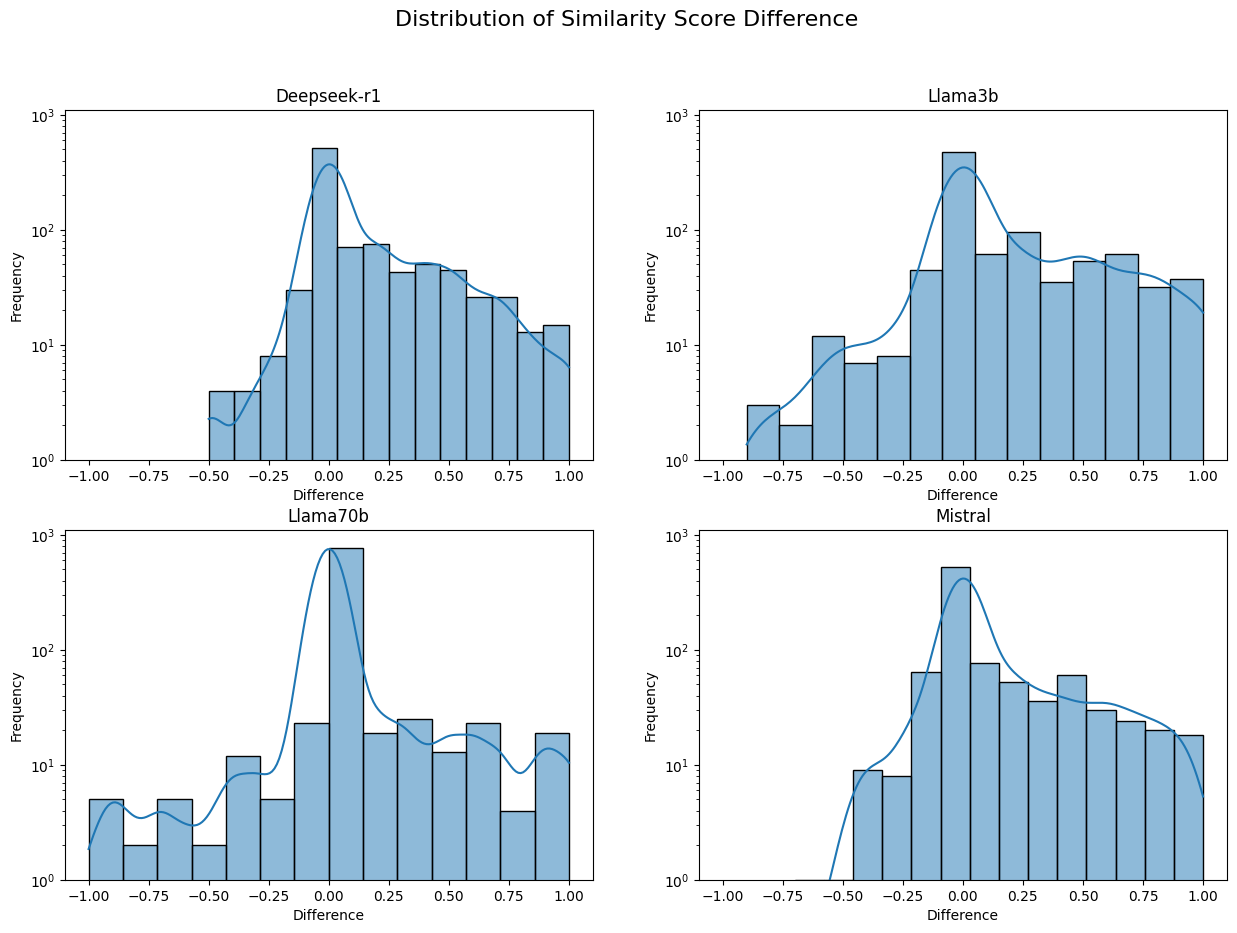

In [150]:
models = ["deepseek-r1", "llama3b", "llama70b", "mistral"]

plt.figure(figsize=(15, 10))
plt.suptitle("Distribution of Similarity Score Difference", fontsize=16)
for i, model in enumerate(models, 1):
    plt.subplot(2, 2, i)
    data_subset = df_pivot[(df_pivot["model"] == model)]
    sns.histplot(data=data_subset, x="difference", bins=14, kde=True)
    plt.title(f"{model.capitalize()}")
    plt.ylim(1, max_y)  # Set the same y-axis limit
    plt.xlim(-1.1, 1.1)  # Set the same x-axis limit
    plt.xlabel("Difference")
    plt.yscale('log')
    plt.ylabel("Frequency")

# df_avg = df[df["model"] == "llama3b"].copy()
# df_avg = df_avg.groupby(['title', 'prompt'])['c_all_fit_hits'].mean().unstack()
# df_avg = df_avg.rename(columns={'benchmark': 'benchmark_avg', 'persona': 'persona_avg'})
# df_avg['difference'] = df_avg['persona_avg'] - df_avg['benchmark_avg']
# df_avg['absolute_difference'] = abs(df_avg['difference'])

# median_difference = df_avg['difference'].median()
# median_absolute_difference = df_avg['absolute_difference'].median()

# plt.figure(figsize=(10, 6))
# sns.histplot(df_avg['difference'], kde=True,bins=20)
# plt.axvline(median_difference, color='red', linestyle='dashed', linewidth=1, label=f'Median Difference: {median_difference:.2f}')
# plt.axvline(median_absolute_difference, color='green', linestyle='dashed', linewidth=1, label=f'Median Absolute Difference: {median_absolute_difference:.2f}')
# plt.axvline(0, color='black', linewidth=0.5)
# plt.title('Distribution of Similarity Score Differences (Persona - Benchmark)')
# plt.yscale('log')
# plt.xlabel('Difference')
# plt.ylabel('Frequency (Number of Occupations)')
# plt.legend()
# plt.show()

Model: deepseek-r1
Wilcoxon Signed-Rank Test Results:
  W-statistic: 4624.5000
  p-value: 0.0000

The p-value (0.0000) is less than the significance level (0.05).
This suggests that there is a statistically significant difference in the similarity scores
between the benchmark and persona conditions across all occupations and iterations.
We reject the null hypothesis that there is no difference.

--------------------------------------------------

Model: llama3b
Wilcoxon Signed-Rank Test Results:
  W-statistic: 12149.0000
  p-value: 0.0000

The p-value (0.0000) is less than the significance level (0.05).
This suggests that there is a statistically significant difference in the similarity scores
between the benchmark and persona conditions across all occupations and iterations.
We reject the null hypothesis that there is no difference.

--------------------------------------------------

Model: llama70b
Wilcoxon Signed-Rank Test Results:
  W-statistic: 4730.0000
  p-value: 0.0000

The p-

C:\Users\godfr\AppData\Local\Temp\ipykernel_32400\3518891216.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  model_data['difference'] = model_data['persona'] - model_data['benchmark']


In [152]:
model_data

title    model  benchmark  \
3                              Accountants and Auditors  mistral        0.0   
7                                                Actors  mistral        0.4   
11                                            Actuaries  mistral        0.0   
15                                       Acupuncturists  mistral        0.0   
19                                    Acute Care Nurses  mistral        0.3   
...                                                 ...      ...        ...   
3675                   Wind Turbine Service Technicians  mistral        0.3   
3679  Woodworking Machine Setters, Operators, and Te...  mistral        0.0   
3683                        Word Processors and Typists  mistral        0.0   
3687                                Writers and Authors  mistral        0.0   
3691                 Zoologists and Wildlife Biologists  mistral        0.0   

      persona  difference        code  
3         0.0         0.0  13-2011.00  
7         1.0         0.6  27-2011.00  
11        0.5         0.5  15-2011.00  
15        0.2         0.2  29-1291.00  
19        0.7         0.4  29-1141.01  
...       ...         ...         ...  
3675      0.5         0.2  49-9081.00  
3679      0.0         0.0  51-7042.00  
3683      0.0         0.0  43-9022.00  
3687      0.0         0.0  27-3043.00  
3691      0.0         0.0  19-1023.00  

[923 rows x 6 columns]

### Recall

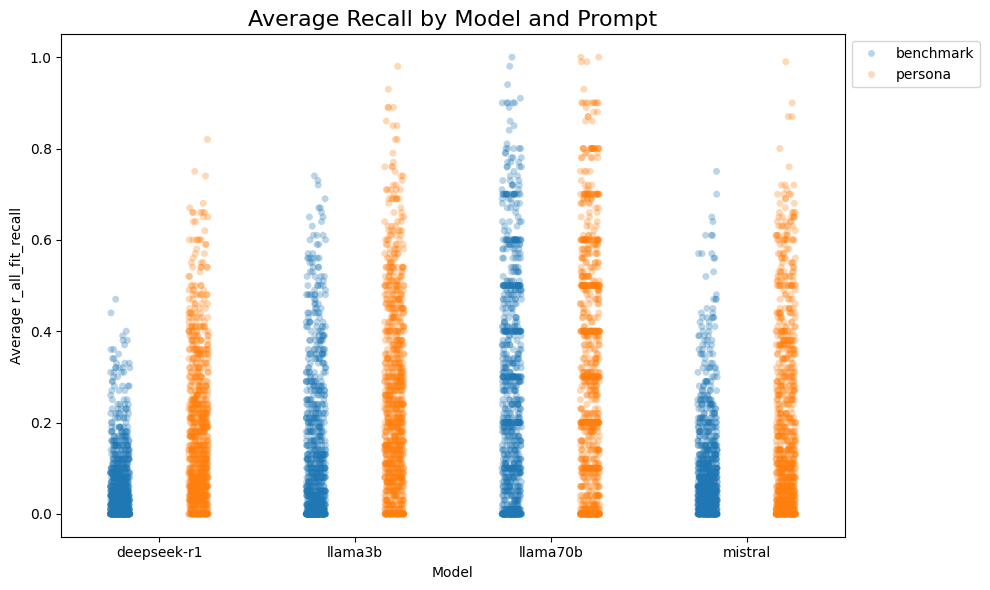

In [9]:
# Calculate the average r_all_fit_recall for each model and prompt
avg_hits = df_avg.groupby(["model", "prompt"])["r_all_fit_recall"].mean().reset_index()

# Create a single barplot
plt.figure(figsize=(10, 6))
# sns.violinplot(data=df_avg, x="model", y="r_all_fit_recall", hue="prompt", bw_adjust=3)
sns.stripplot(data=df_avg, x="model", y="r_all_fit_recall", hue="prompt", dodge=True, 
              size=5, alpha=0.3, jitter=True)

# Add labels and title
plt.title("Average Recall by Model and Prompt", fontsize=16)
plt.xlabel("Model")
plt.ylabel("Average r_all_fit_recall")
 # Ensure some padding on the y-axis, no box around the legend
plt.legend(bbox_to_anchor=(1, 1), loc='upper left')

# Show the plot
plt.tight_layout()
plt.show()